[*********************100%%**********************]  1 of 1 completed
Mean Absolute Error: 1.7394422348685883


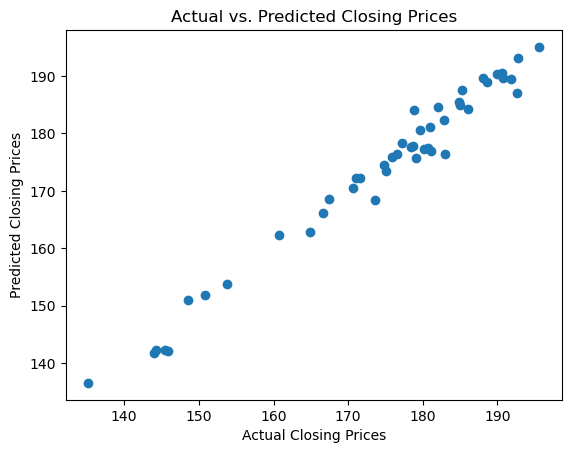

In [1]:
# Import necessary libraries
!pip install yfinance
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Function to fetch historical stock prices using Yahoo Finance API
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Define the stock and date range
ticker_symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2023-12-01"

# Fetch historical stock prices
stock_prices = get_stock_data(ticker_symbol, start_date, end_date)

# Create a DataFrame with features and target variable
df = pd.DataFrame(stock_prices, columns=['Close'])
df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfMonth'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Shift the closing prices to create the target variable
df['Target'] = df['Close'].shift(-1)

# Drop the last row with NaN target (due to shifting)
df = df.dropna()

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Close', 'Target', 'Date'], axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualize predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices')
plt.show()


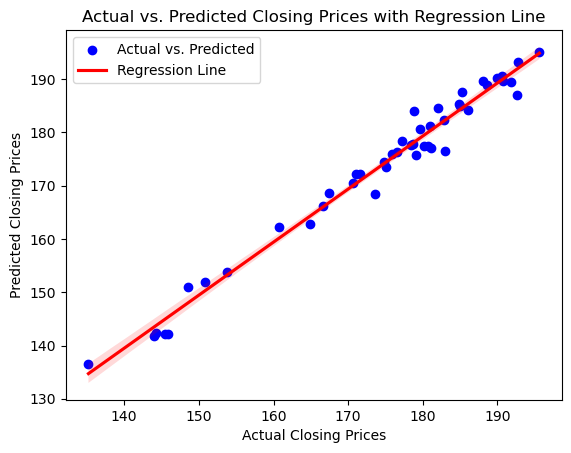

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for the regression line



# Visualize predicted vs. actual prices with regression line
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression Line')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices with Regression Line')
plt.legend()
plt.show()


In [3]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame for actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate additional metrics
result_df['Absolute Error'] = abs(result_df['Actual'] - result_df['Predicted'])
result_df['Squared Error'] = (result_df['Actual'] - result_df['Predicted'])**2

# Save the DataFrame to a CSV file
result_df.to_csv('regression_results.csv', index=False)

# Print metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1.7394422348685883
Mean Squared Error: 5.5661239521694
R-squared: 0.9758956448785456


In [4]:
# Specify the path to the CSV file
csv_file_path = 'regression_results.csv'

# Read the CSV file into a DataFrame
result_df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(result_df)

        Actual   Predicted  Absolute Error  Squared Error
0   184.800003  185.438897        0.638894       0.408185
1   160.800003  162.287605        1.487601       2.212958
2   135.210007  136.567601        1.357595       1.843063
3   178.389999  177.676601        0.713398       0.508937
4   143.960007  141.763300        2.196707       4.825522
5   175.839996  175.870402        0.030405       0.000924
6   150.869995  151.849199        0.979204       0.958840
7   180.710007  177.398303        3.311703      10.967380
8   176.570007  176.353199        0.216808       0.047006
9   190.679993  189.585701        1.094292       1.197474
10  182.889999  182.287105        0.602894       0.363482
11  145.429993  142.251700        3.178293      10.101546
12  171.559998  172.237600        0.677602       0.459145
13  179.070007  175.761701        3.308306      10.944891
14  190.639999  190.562597        0.077403       0.005991
15  192.750000  193.162403        0.412403       0.170076
16  181.990005